<a href="https://colab.research.google.com/github/gkckdals3/machine-deep-leaning-study/blob/main/_14Study_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-10-09 13:05:55--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-10-09 13:05:55--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-10-09 13:05:56--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [4]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

In [5]:
#주성분 분석: 데이터에 있는 분산이 가장 큰 방향을 찾는 것
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
print(pca.components_.shape)

(50, 10000)


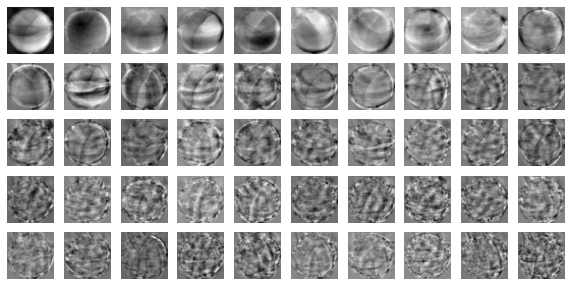

In [19]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows=int(np.ceil(n/10))
  cols=n if rows<2 else 10
  fig,axs=plt.subplots(rows,cols,
                       figsize=(cols*ratio,rows*ratio),squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i *10+j<n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()
draw_fruits(pca.components_.reshape(-1,100,100))

In [20]:
print(fruits_2d.shape)

(300, 10000)


In [21]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [22]:
#원본 데이터 재구성
#앞에서 10000개의 특성을 50개로 줄였다. 이로 인해 어느 정도 손실이 발생할 수밖에 없다.
#하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


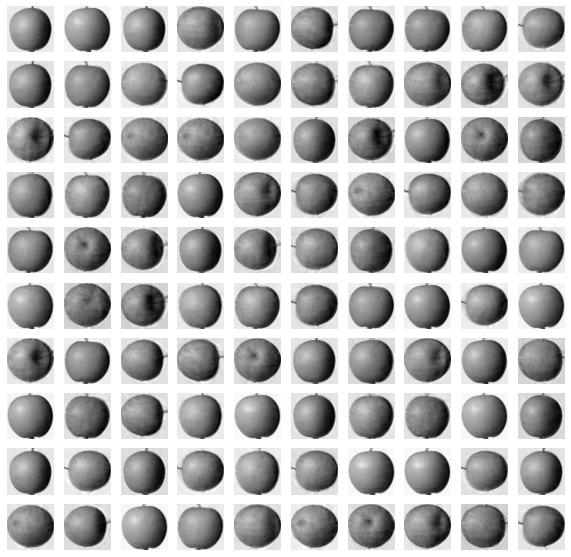

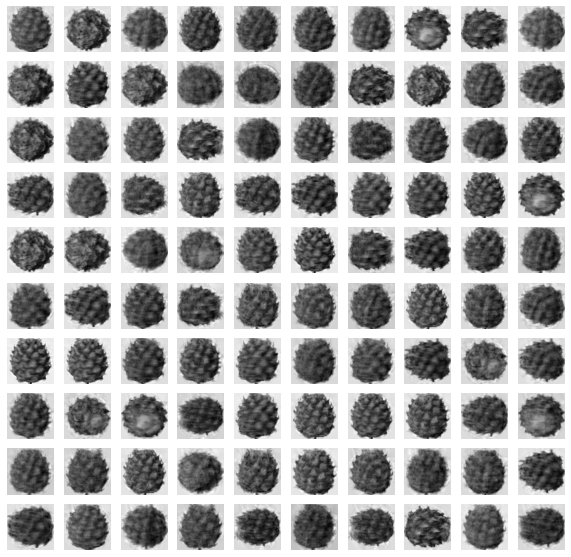

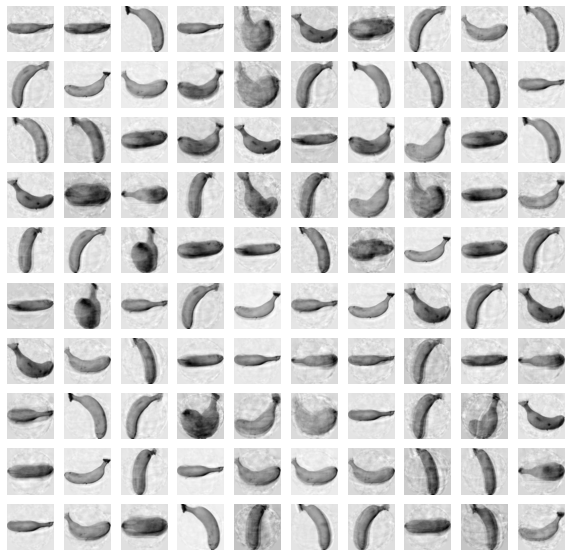

In [24]:
#일부 흐리고 번진 부분이 있지만 불과 50개의 특성을 10000개로 늘린 것을 감안하면 잘 복원이 되었다.
#이 50개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문이다.
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [25]:
#주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 'explained variance'라고 한다.
#pca클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다.
#당연히 첫 번째 주성분의 설명된 분산이 가장크다.
print(np.sum(pca.explained_variance_ratio_))

0.9214150858709546


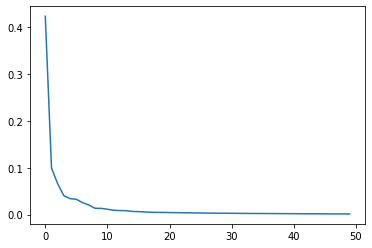

In [26]:
plt.plot(pca.explained_variance_ratio_)

In [27]:
#LogisticRegression 과 함께 사용하기
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
target=np.array([0]*100+[1]*100+[2]*100)

In [28]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.1689097881317139


In [29]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.026565694808959962


In [30]:
pca=PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
print(pca.n_components_)

2


In [32]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [33]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.039805269241333006


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [40]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


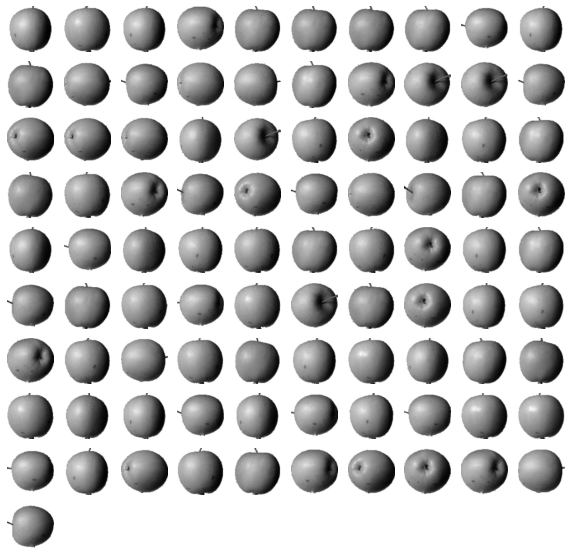

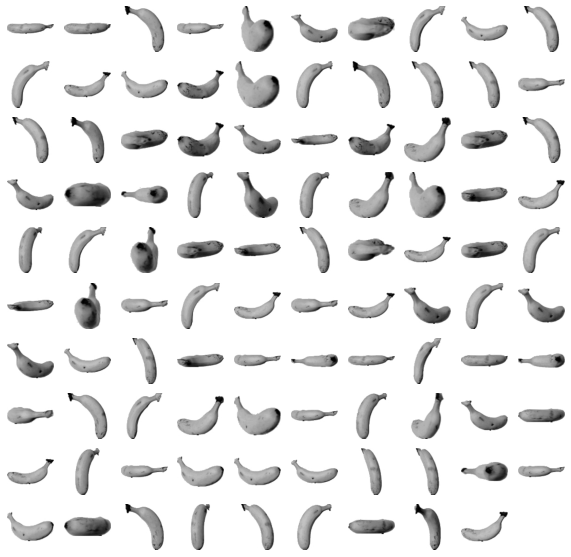

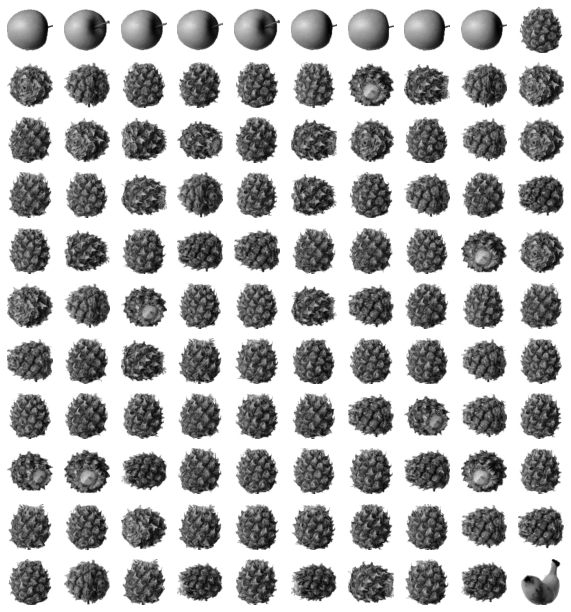

In [45]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

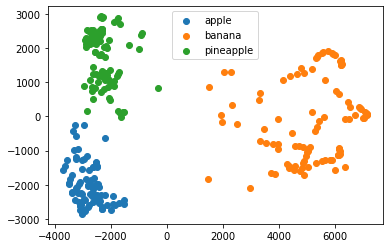

In [46]:
for label in range (0,3):
  data=fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()